In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dpSG53lPpC74cNUbwKrO")
project = rf.workspace("miskat-vxtfl").project("coco-11")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to coco@11-1 in yolov11:: 100%|██████████| 4019/4019 [00:00<00:00, 6107.49it/s]


In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.7/8062.4 GB disk)


In [3]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../test/images' >> {dataset.location}/data.yaml

In [4]:
!yolo task=detect mode=train model=yolo11s.pt data=/kaggle/working/coco@11-1/data.yaml epochs=50 imgsz=640 plots=True

100%|███████████████████████████████████████| 18.4M/18.4M [00:00<00:00, 136MB/s]
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/coco@11-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save

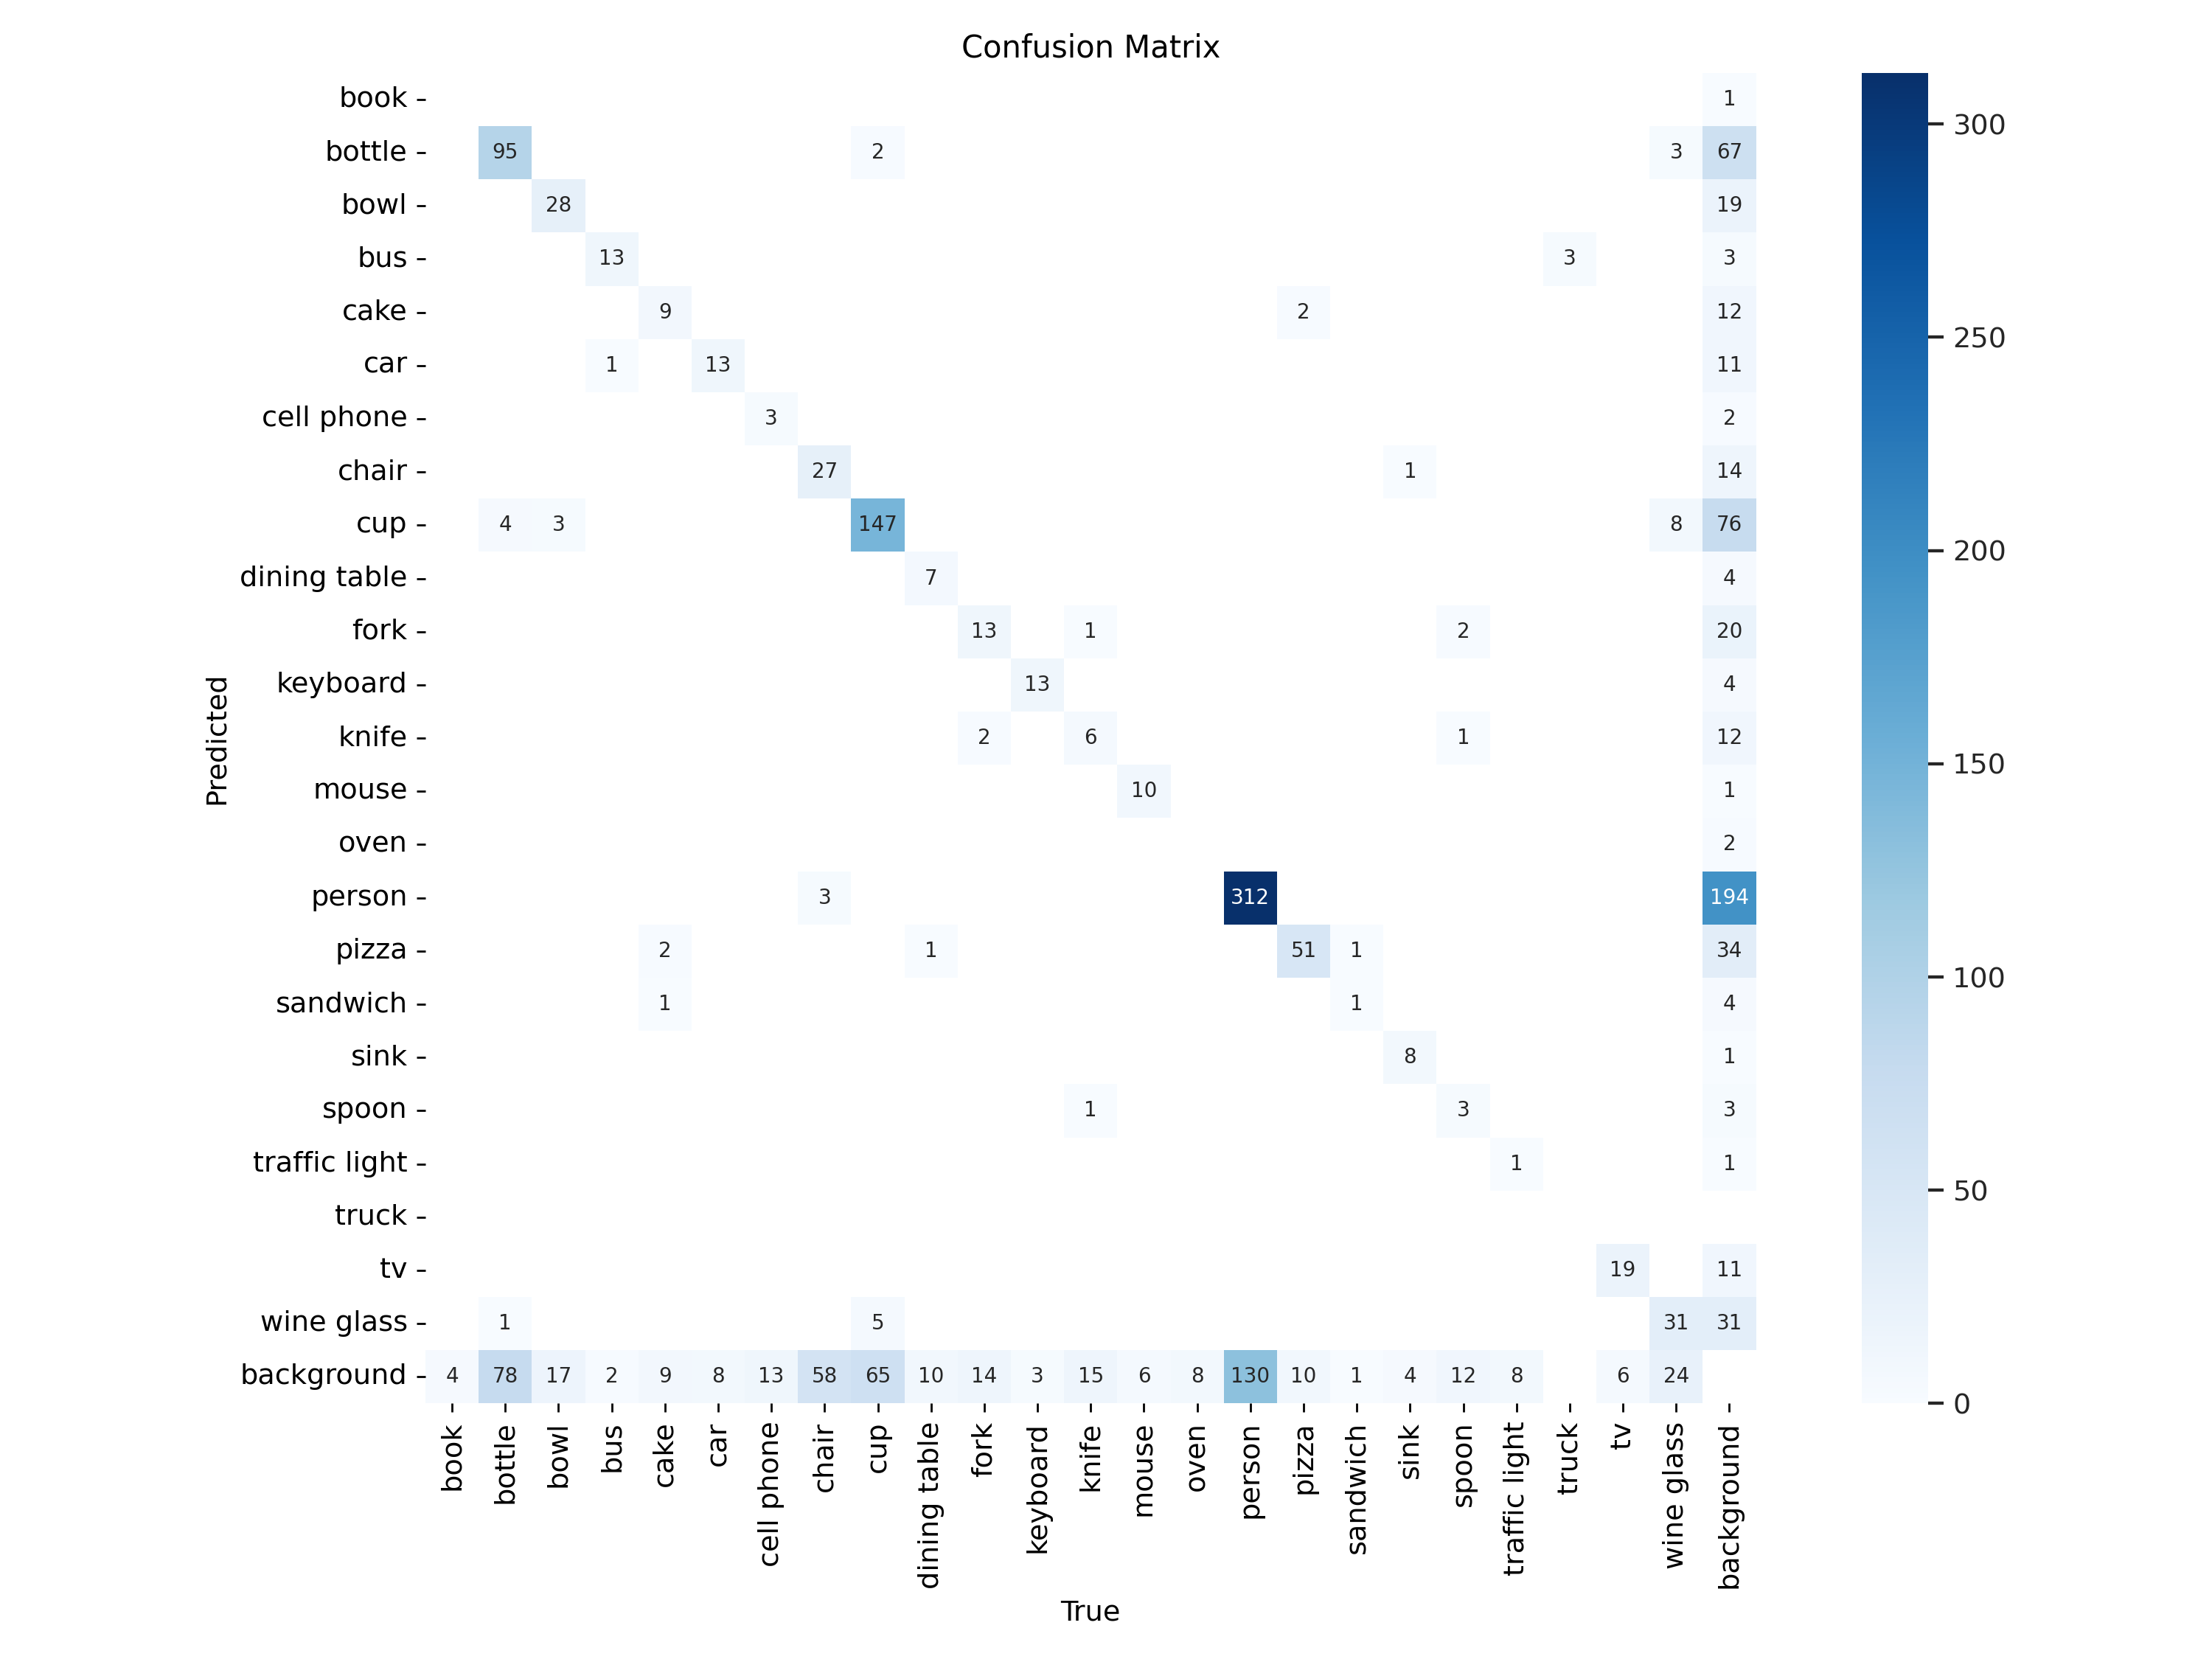

In [6]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)


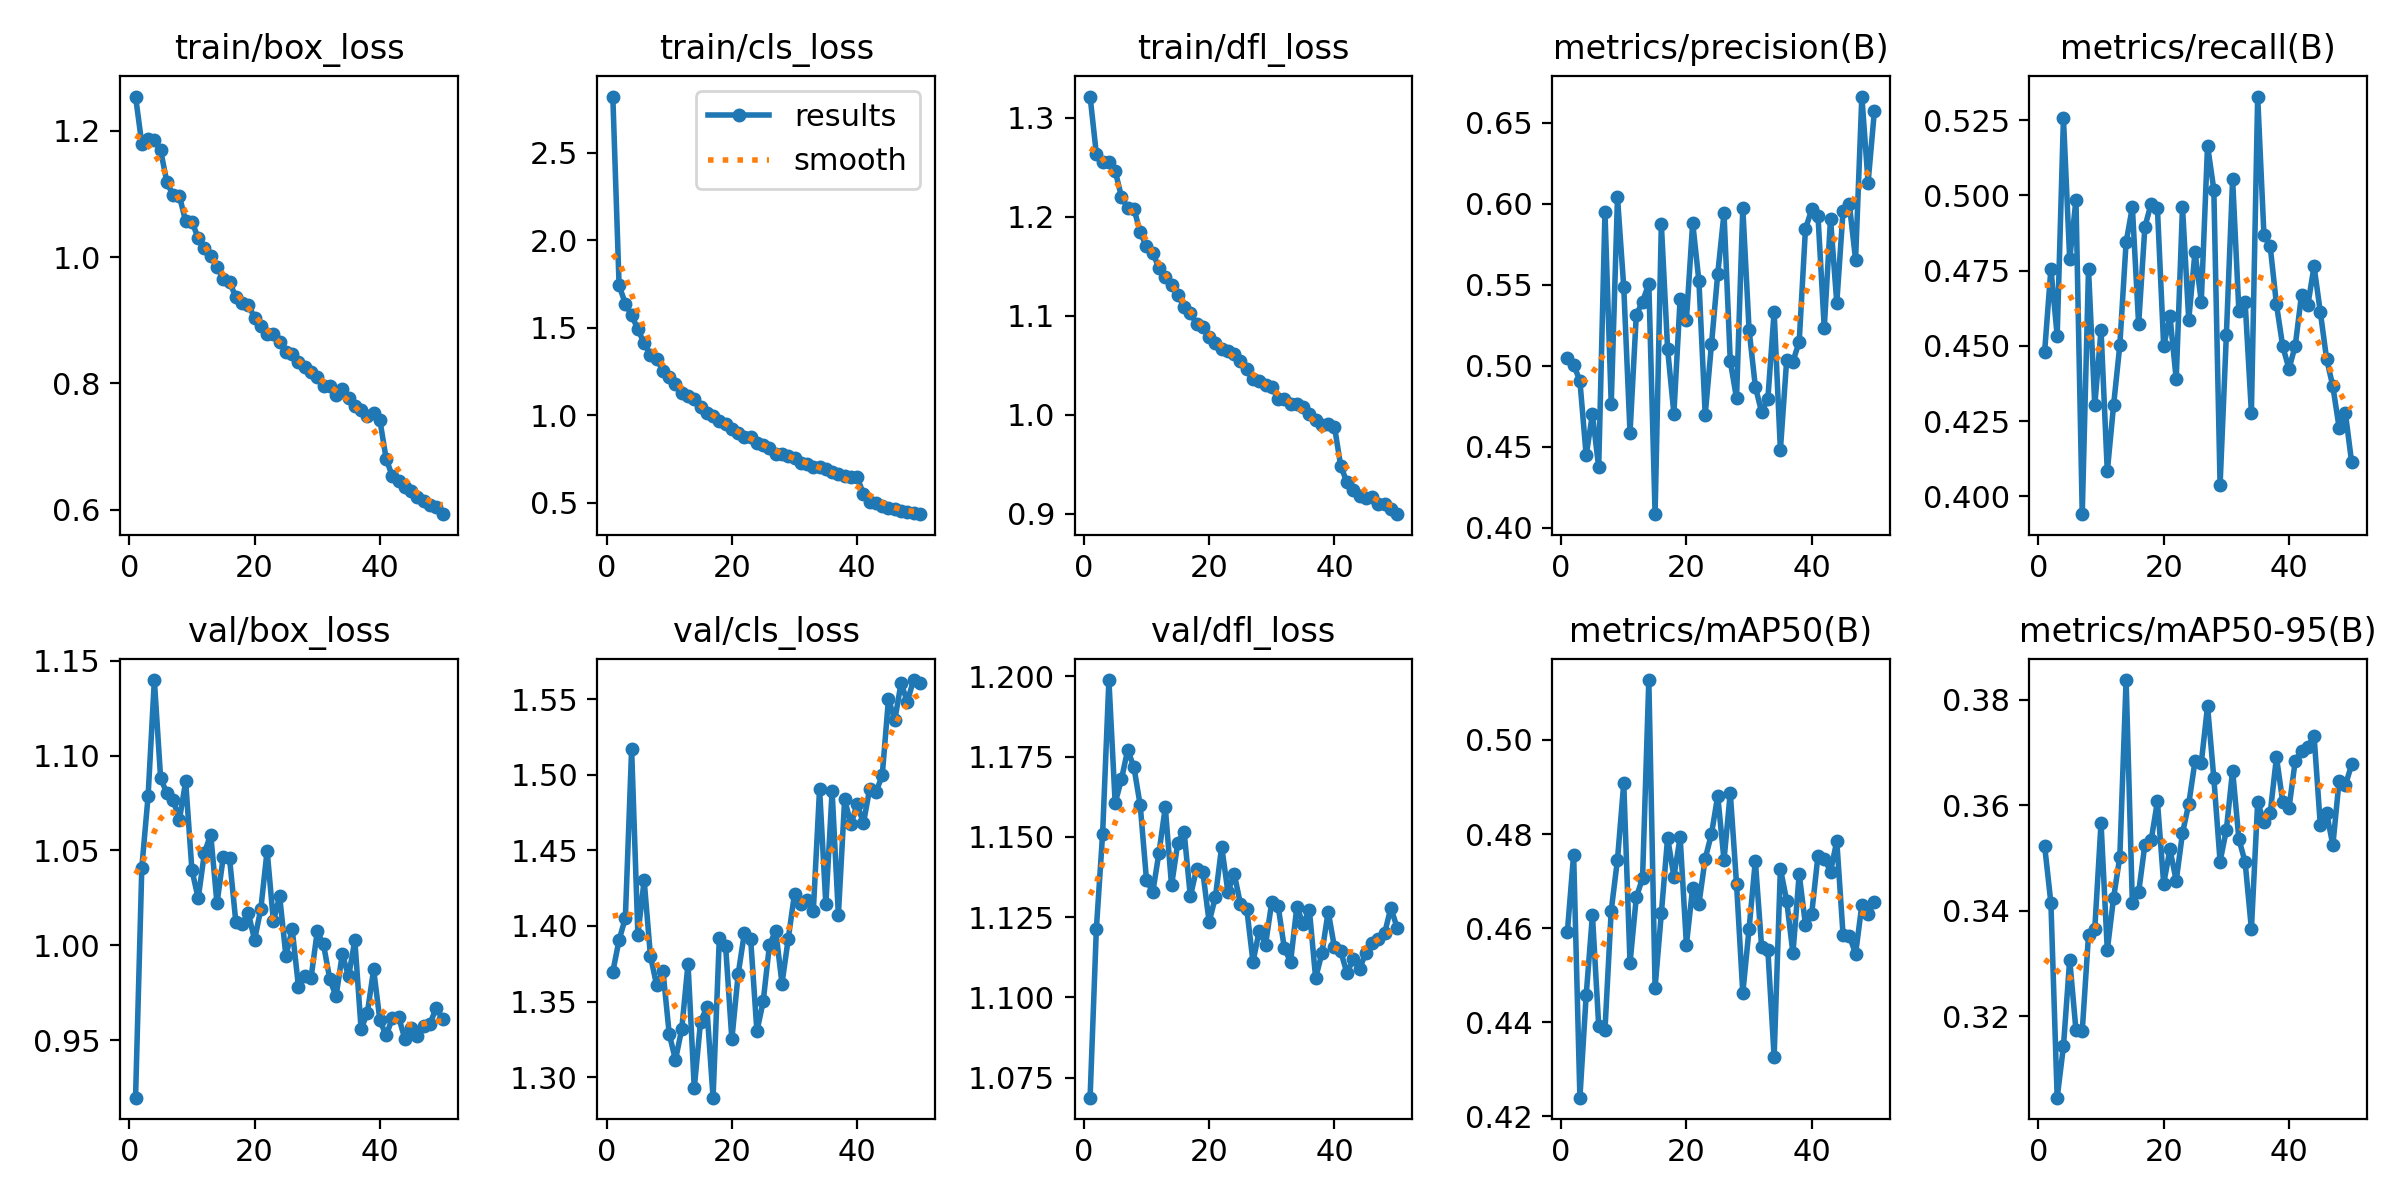

In [7]:
IPyImage(filename=f'/kaggle/working/runs/detect/train/results.png', width=600)

In [8]:
import pandas as pd

# Load the CSV file
file_path = '/kaggle/working/runs/detect/train/results.csv'
df = pd.read_csv(file_path)

df


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,41.6036,1.25414,2.81929,1.32159,0.50498,0.44812,0.45924,0.35227,0.91975,1.36969,1.06879,0.000118,0.000118,0.000118
1,2,76.3540,1.17932,1.74220,1.26357,0.50065,0.47565,0.47565,0.34145,1.04095,1.39071,1.12138,0.000232,0.000232,0.000232
2,3,110.9920,1.18620,1.63698,1.25508,0.49059,0.45340,0.42399,0.30454,1.07846,1.40522,1.15098,0.000342,0.000342,0.000342
3,4,145.8920,1.18527,1.57019,1.25585,0.44456,0.52570,0.44573,0.31426,1.13976,1.51702,1.19882,0.000336,0.000336,0.000336
4,5,181.4600,1.16907,1.49249,1.24651,0.47005,0.47873,0.46279,0.33074,1.08817,1.39419,1.16051,0.000329,0.000329,0.000329
5,6,217.7970,1.11844,1.41059,1.22050,0.43713,0.49856,0.43927,0.31731,1.08003,1.43026,1.16788,0.000322,0.000322,0.000322
6,7,254.6290,1.09771,1.34561,1.20852,0.59481,0.39409,0.43841,0.31716,1.07669,1.38033,1.17710,0.000315,0.000315,0.000315
7,8,291.4290,1.09686,1.32289,1.20836,0.47624,0.47554,0.46376,0.33538,1.06615,1.36059,1.17163,0.000308,0.000308,0.000308
8,9,328.3010,1.05653,1.25585,1.18428,0.60398,0.43020,0.47460,0.33653,1.08637,1.37035,1.15983,0.000300,0.000300,0.000300
9,10,365.2070,1.05600,1.22050,1.17045,0.54836,0.45526,0.49083,0.35664,1.03963,1.32861,1.13664,0.000293,0.000293,0.000293


In [ ]:
/kaggle/input/metrics/yolo11sReport.csv

In [9]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/working/coco@11-1/test/images save=True

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,422,088 parameters, 0 gradients, 21.4 GFLOPs

image 1/154 /kaggle/working/coco@11-1/test/images/COCO_val2014_000000009275_jpg.rf.2ed1732832c65f7024eb293379a45988.jpg: 640x480 3 bottles, 2 cups, 1 person, 48.2ms
image 2/154 /kaggle/working/coco@11-1/test/images/COCO_val2014_000000012666_jpg.rf.596a1f32dab030fb185ab973a8ebf954.jpg: 640x480 1 bus, 6 persons, 12.4ms
image 3/154 /kaggle/working/coco@11-1/test/images/COCO_val2014_000000015345_jpg.rf.cc8d519a91b967d683e284f92818c50d.jpg: 640x480 4 cups, 3 persons, 12.3ms
image 4/154 /kaggle/working/coco@11-1/test/images/COCO_val2014_000000021686_jpg.rf.a5b7a6e7189fecb951c3eeaa7c49324c.jpg: 640x480 1 cake, 1 cup, 1 knife, 3 persons, 2 pizzas, 3 wine glasss, 12.3ms
image 5/154 /kaggle/working/coco@11-1/test/images/COCO_val2014_000000032941_jpg.rf.e386414e56bfb9fe2b03410fe3f3576d.jpg: 640x480 2 buss, 3 cars, 3 persons, 1 traff

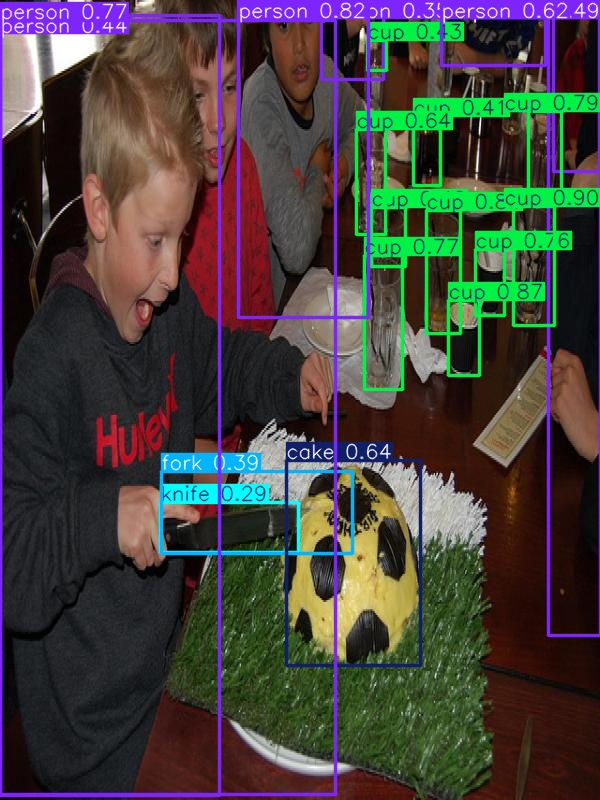

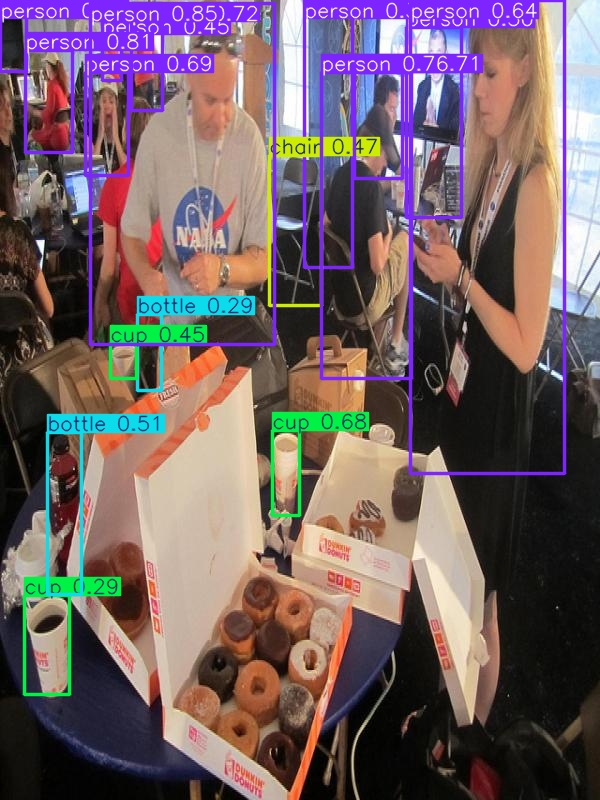

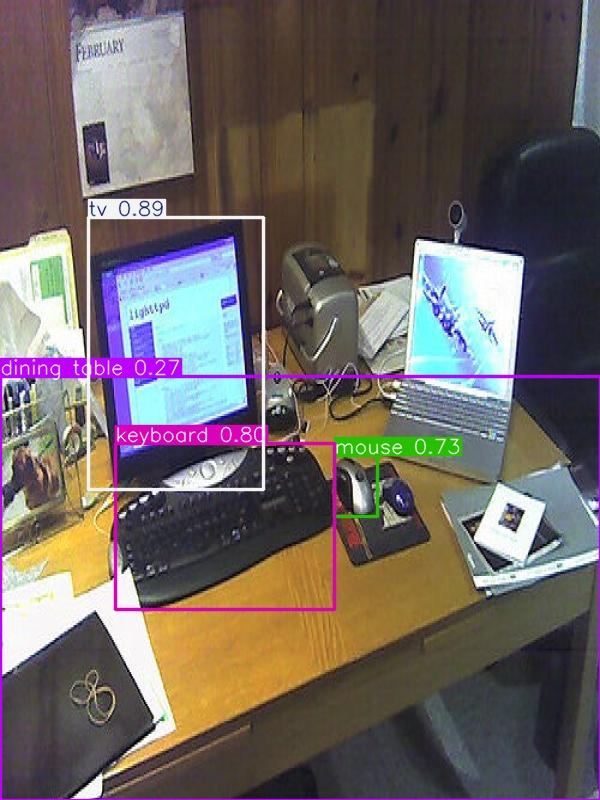

In [11]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
	display(IPyImage(filename=img, width=600))
	print("\n")

In [18]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git

Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 82 (delta 9), reused 14 (delta 5), pack-reused 57 (from 1)
Receiving objects: 100% (82/82), 29.78 MiB | 33.69 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [19]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [20]:
!ls

coco@11-1  runs  yolo11n.pt  yolo11s.pt  YOLO-V8-CAM  yolov9s.pt


In [21]:
%cd /kaggle/working/YOLO-V8-CAM

/kaggle/working/YOLO-V8-CAM


In [22]:
!ls

 images        models	   yolo_cam
 LICENSE.txt   README.md  'YOLO v8n EigenCAM.ipynb'


In [23]:
!pip install ttach

In [26]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [27]:
img = cv2.imread('/kaggle/working/coco@11-1/test/images/COCO_val2014_000000009275_jpg.rf.2ed1732832c65f7024eb293379a45988.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [28]:
import ultralytics
from ultralytics import YOLO
model = YOLO('/kaggle/working/yolo11n.pt') 
model.cpu()

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [29]:
target_layers =[model.model.model[-2]]

In [32]:
cam = EigenCAM(model, target_layers,task='od')


0: 640x640 2 persons, 1 suitcase, 3 bottles, 2 cups, 1 chair, 212.0ms
Speed: 7.2ms preprocess, 212.0ms inference, 14.3ms postprocess per image at shape (1, 3, 640, 640)


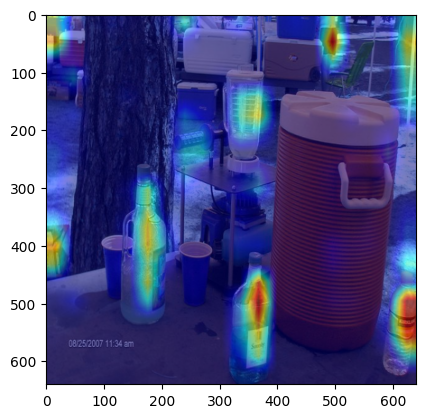

In [33]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [35]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]


0: 640x640 2 persons, 1 suitcase, 3 bottles, 2 cups, 1 chair, 152.5ms
Speed: 2.8ms preprocess, 152.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


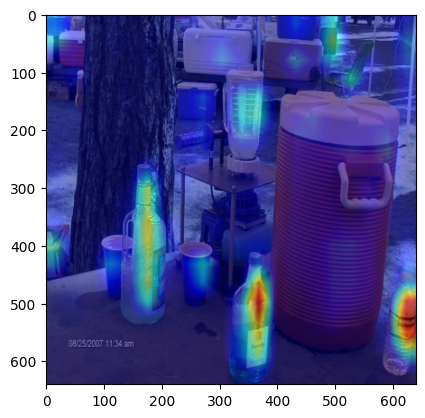

In [36]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

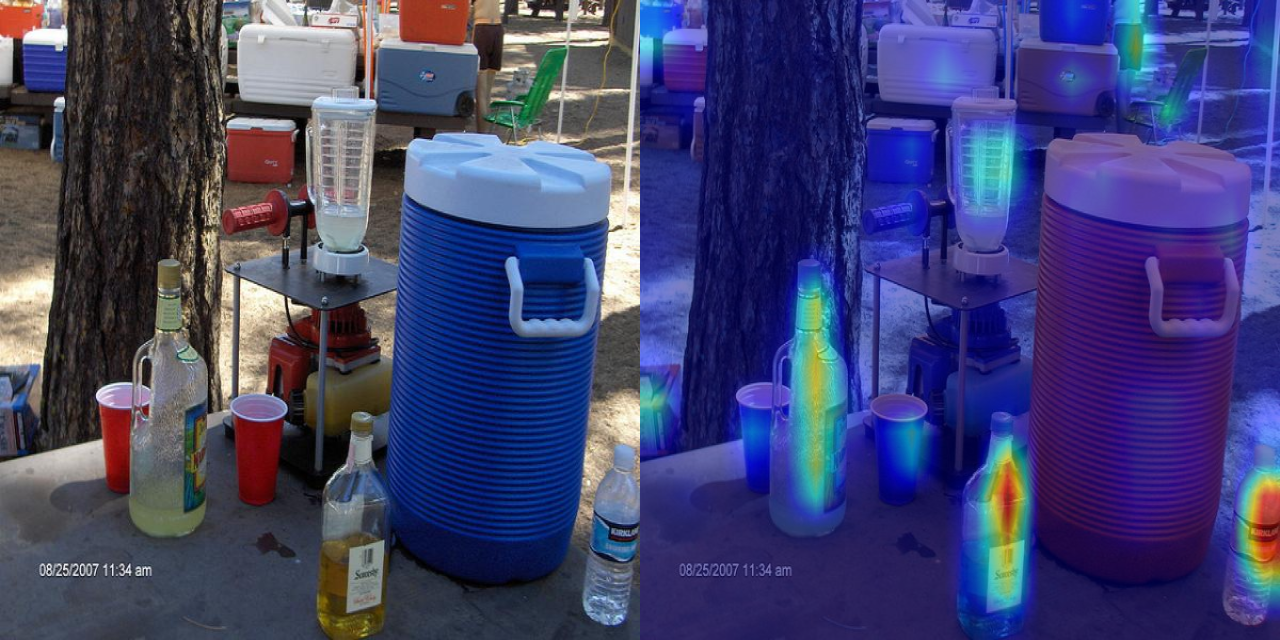

In [37]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))